# Ejeção de Massa Coronal e Tempestade Magnética Solar

* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 04/2021

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.


Já publicamos sobre o [Ciclo Magnético Solar por Transformada de Fourier](https://github.com/GabrielZuza/PET/blob/master/Sunspots.ipynb) onde falamos sobre o ciclo magnético solar e como poderíamos o determinar a partir de dados de solarspots. E nesse `Notebook` vamos tratar de consequencias de uma Tempestade Magnética no sol.

# Introdução 

   Tempestades magnéticas solares são bem mais comuns do que imaginamos, principalmente no período mais ativo do ciclo magnético solar. Inclusive dependendo da magnitude e direção, esses fenômenos podem causar danos à terra (mesmo com a presença do campo magnético terrestre, o qual geralmente serve como escudo a esse tipo de evento).

   Em 1859 especificamnte existem registros de um evento desses fortíssimo que atinjiu a terra, astronomos ingleses registraram um feixe de luz branca na fotosfera solar,  auroras polares foram vistas em todo o mundo, do hemisfério norte até o Caribe central, nos Estados Unidos era possível ler um jornal apenas com a luz da aurora. As auroras eram visíveis tanto nos polos quanto em lugares como Cuba e Havaí. Alguns postes telegráficos também ficaram com faíscas, sistemas de telégrafo  entraram em pane e, em alguns casos, telegrafistas receberam choques elétricos. Alguns sistemas telegráficos continuaram a enviar e receber mensagens, mesmo após ter sido desligado de suas fontes de alimentação. Esse evento ficou conhecido como [Evento Carrington](https://pt.wikipedia.org/wiki/Tempestade_solar_de_1859) .

Para entender o que é uma Ejeção de Massa Coronal (EMC) é presciso entender que o sol (todas as estrelas em geral) tem várias camadas começando pelo Núcleo (Core) até a Corona, as vezes chamada de coroa, que é a última camada do sol. É importante ressaltar que essas camadas não seguem um gradiente de temperatura (da mais quente à mais fria começando do Core e esfriando com o aumento do raio), o que seria intuitivo já que pelos modelos estelares a fonte de energia das estrelas são os processos de fussão nuclear no Core.

Na verdade a temperatura mínima é rigistrada na fotosfera onde chegamos a medir cerca de $5800 K$ e na Corona temos um aumento repentido e de altíssima magnitude, é possivel medir temperaturas tão altas como $1 \times 10^{6} K$. Esse aumento **não** é explicado pelas teorias estado-da-arte da Astrofísica Estelar e consiste no [Problema de aquecimento da Corona](https://en.wikipedia.org/wiki/Stellar_corona#Coronal_heating_problem) 


![solar layers](https://secureservercdn.net/50.62.174.189/7nk.fe3.myftpupload.com/wp-content/uploads/2018/08/figura1.png)

As Ejeções de Massa Coronal (CME - do inglês Coronal Mass Ejection) ocorrem devido à reconexão magnética, fenômeno associado ao rearranjamento das linhas de campo quando dois campos magnéticos são orientados de modo que um está com mesma direção mas com sentido oposto ao outro. A teoria da reconexão magnética se baseia no campo magnético solar para induzir correntes elétricas na coroa solar. As correntes então entram em colapso repentinamente, liberando energia como calor e energia das ondas na corona. Tudo isso difere um pouco da Teoria clássica do Eletromagnetismo uma vez que estamos tratando de um Plasma.

Em um Plasma, as linhas de campo magnético são normalmente ligadas a pedaços individuais de matéria, de modo que a topologia do campo magnético permanece a mesma: se um determinado pólo magnético norte e sul estiverem conectados por uma única linha de campo, então mesmo se o plasma for agitado ou se os ímãs são movidos, essa linha de campo continuará a conectar esses pólos particulares. A conexão é mantida por correntes elétricas que são induzidas no plasma. O plasma possui propriedades únicas como altíssima condutibilidade e a capacidade de arrastar linhas de campo magnético (de corrente da sua condutibilidade)

Uma boa é introdução à física de plasmas pode ser encontrada nesse [Seminário do Dr. Matthew Kunz de Princeton University de introdução a física de Plasma, em inglês](https://www.youtube.com/watch?v=A9pUXEI128U&ab_channel=InstituteforAdvancedStudy) 

# Analisando as Consequências de uma EMC

Indo para a parte do código vamos analisar quais seriam as consequencias de uma EMC em direção a terra. Para isso prescisamos de duas coisas. 
1. Detectar uma CME em direção a terra 
2. Medir as propriedades do plasma em interação com essa Ejeção.


Primeiro vamos trabalhar no item 1. Encontrar uma CME em direção a Terra, para isso vamos usar as imagens do satélite SDO (Solar Dynamics Observatory) da NASA. O SDO foi lannçado em 2010 e registra imagens do Sol em altíssima resolução e em diversos comprimentos de onda, Para nossos fins vamos utilizar um comprimento de onda o qual seja mais favorável a visualização de EMC.
Usaremos $  \lambda = 304  \;\mathring A  \approx 30.4 \;nm$, esse comprimento de onda está associado ao extremo ultravioleta.

Vamos usar dados de 10/09/2014, quando estávamos no ultimo máximo do ciclo solar, nesse dia o foi o correu uma CME em direção a terra e detectada pelo SDO, como podemos ver na imagem abaixo, na região indicada por um círculo amarelo, é possivel ver um repentino aumento de brilho.

[Você pode baixar os dados do SDO clicando aqui](https://sdo.gsfc.nasa.gov/) 


![CME](Plots/sdo.gif)

Apartir disso já podemos tentar detectar qual a influênacia que essa ejeção gera próxima a terra. Para isso, vamos usar dados do satélite ACE (Advanced Composition Explorer) da NASA. O ACE está localizado no ponto $L_1$ de Lagrange e portanto consegue coletar dados sempre, a obstrução pela terra nunca acontece, através dele conseguimos dados de Campo Magnético e Elétrico, Velocidade, densidade de partículas e Temperatura.

Assim, fizemos o download dos dados desses parâmetros pra o período do dia 09/09/2014 ao dia 16/09/2014.

Todos os dados aqui utilizados podem ser encontrados e baixados no [Space Physics Data Facility (SPDF) da NASA](https://spdf.gsfc.nasa.gov/).

## Importanto bibliotecas, constantes e os dados da NASA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [2]:
a = np.loadtxt('solar.txt',delimiter=None)

Agora vamos desempacotar os dados, coluna a coluna:

In [3]:
time = a[:,1]
B = a[:,2]
Vx = a[:,3]
Vy =  a[:,4]
Vz =  a[:,5]
density = a[:,6]
temp = a[:,7]
E = a[:,8]

## Remoção de Outliers

Perceba que os dados, como em todos os dados reais, não simulados, apresentam pontos Outliers, assim é necessesário fazer uma breve tratamento nesses dados antes de fazer o gráfico.

O segredo para fazer um tratamento de dados correto é que não a segredo. O processo é completamente varável de dataset para dataset. Alguns livros sobre o assunto inclusive, perpetuam uma frase de efeito **`Know Your Data`** -  Conheça a sua amostra, só assim será possével tomar descisões eurísticas coerentes que não impactem em nenhuma tendencia de curto ou longo prazo.

Para o nosso caso, esse trabalho já está quase todo feito, para cada um dos parâmetros existe um valor facilmente identificado que representa os outliers, para o Campo Magnético por exemplo, ese valor é de $9999\; [nT]$, portanto todos os pontos com esse valor podem ser considerados Outliers. Assim, vamos resolver isso da seguinte forma, vamos criar uma mascara que filtra para apenas pontos de campo magnético menores que $9999$ ou seja vamos ficar com $B \leq 9999$.

In [4]:
mask = B < 9999

Agora vamos aplicar essa mascará tanto para o tempo quanto para o campo magnético:

In [5]:
ticks = time[mask].astype('datetime64[s]').tolist()
B = B[mask]

Assim, podemos plotar os dados ajustados para Outliers.

Esse procedimento será repetido para os demais parâmetros, agora que conhecemos os seus procederes

### Campo Magnético

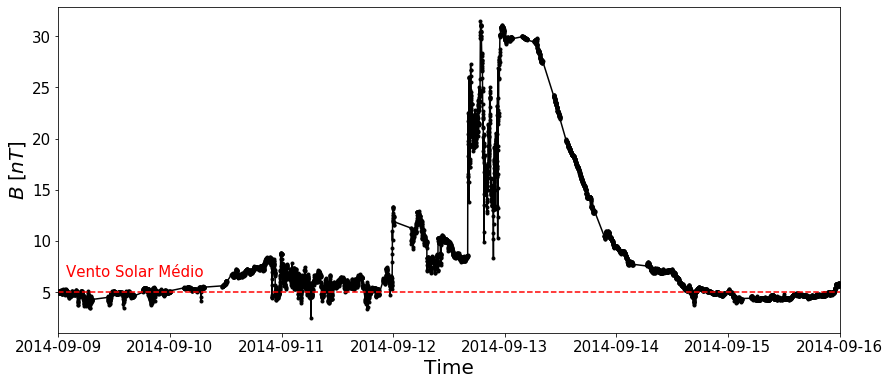

In [6]:
fig = plt.figure(figsize=(14,6))
plt.plot(ticks, B,'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.xlabel('Time',fontsize=20)
plt.axhline(5,c='r',ls='--')
plt.annotate('Vento Solar Médio',xy=[ticks[100],6.5],c='r',fontsize=15)
plt.ylabel(r'${B} \;[nT]$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Aqui já é possivel constatar o impacto do evento estelar, o campo magnético chega a atingir valores $6\times$ maiores que o vento solar médio.

Ainda assim, esse valor em termos absolutos é bem menos aos observados na terra **para essa CME**, Para termos comparativos além do valor de vento solar médio representado na figura. O campo magnético da terra no equador magnético é na casa de  $30.000 \; nT$ e pode chegar em até $60.000\; nT$ nos polos magnéticos

### Velocidade

Vamos repetir o mesmo procedimento, tanto de plot quanto de remoção de Outliers através de máscaras daqui para frente já que já temos essa ferramenta dominada.

Todos os dados estão no sistema de coordenadas $GSE$ (Geocentric solar ecliptic) que é um sistema de coordenadas muito usado na astronomia do sistema solar, é um sistema ortonormal onde o centro do sistema é no centro da terra, eixo $X_{GSE}$ aponta para o sol e o eixo $Z_{GSE}$ é perpendicular ao plano da órbita da Terra em torno do Sol com o positivo para o Norte e o eixo $Y_{GSE}$ é dado portanto por $ \hat{Y}_{GSE} =  \hat{X}_{GSE} \times  \hat{Z}_{GSE}$. A grande vantagem desse sistema é que ele é fixo em relação à linha Terra-Sol.

É geralmente utilizado para calculos que envolvam a magnetosféricos (como no caso desse problema). 

![GSE](https://kutaibaa-akraa.github.io/CeleCoorConv/300px-Ra_and_dec_rectangular.png) 

Assim, a velocidade que temos também seguirá esses sistema de coordenadas:

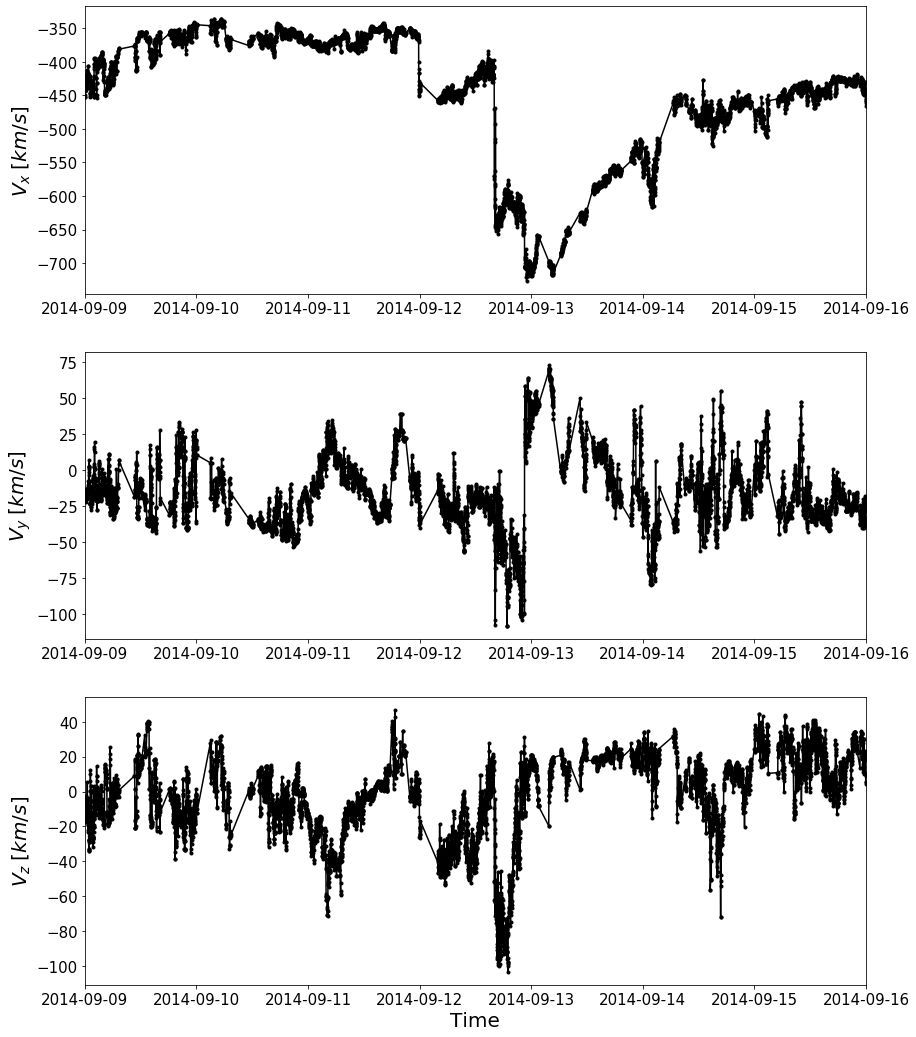

In [7]:
fig = plt.figure(figsize=(14,18))

plt.subplot(311)

mask = Vx < 9999
ticks = time[mask].astype('datetime64[s]').tolist()

plt.plot(ticks, Vx[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.ylabel(r'$V_{x} \;[km/s]$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(312)

mask = Vy < 9999
ticks = time[mask].astype('datetime64[s]').tolist()

plt.plot(ticks, Vy[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.ylabel(r'$V_{y} \;[km/s]$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(313)

mask = Vx < 9999
ticks = time[mask].astype('datetime64[s]').tolist()

plt.plot(ticks, Vz[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.xlabel('Time',fontsize=20)
plt.ylabel(r'$V_{z} \;[km/s]$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Veja que como a CME é transmitida no sentido Sol-Terra. Ela só tem componente no eixo $X_{GSE}$, nos outros eixos os valores flutuam próximo ao zero.

Vamos agora fazer o módulo da velocidade e plotar juntamente com um valor de referência encontrado na literatura:

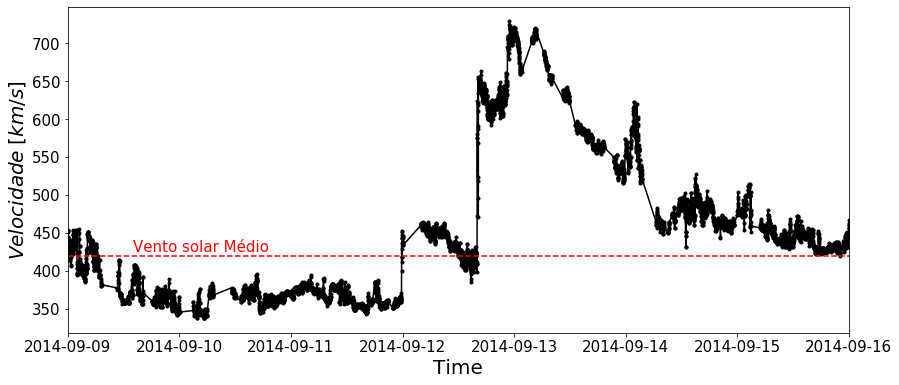

In [8]:
fig = plt.figure(figsize=(14,6))
v = np.sqrt(Vx**2+Vy**2+Vz**2)
mask = v < 999
ticks = time[mask].astype('datetime64[s]').tolist()
plt.plot(ticks, v[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.ylabel(r'$Velocidade \;[km/s]$',fontsize=20)
plt.axhline(420,c='r',ls='--')
plt.annotate('Vento solar Médio',xy=[ticks[500],425],c='r',fontsize=15)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Novamente, para criar uma noção de magnitude que essas velocidades representam, a velocidade do som em kilometros por segundo é aproximadamente $0.343\; km/s$. Ou seja, as velocidades detectadas ultrapassam por muito a velocidade do som e por isso são supersônicas

Além disso, como temos uma medida de velocidade e também sabemos o tempo que essa CME demorou para chegar a terra (pois observamos no SDO o exato momento que a CME acontecem, podemos usar simples relações da cinemática para obter uma estimativa da distância terra-sol. Supondo uma Velocidade Constante:

$$ V = \frac{\Delta S}{\Delta T}$$

$$ \Delta S =  V \Delta T$$

Usando $700 \;[km/s]$ como foi visto pelos dados e estimando $2.5 \; \text{dias}$ como tempo do trajeto, temos:

$$ \Delta S = 700 \;[km/s] \;2.5\; [dias]$$

$$ \Delta S = 151.200.000 \; \text{km}$$

A partir dessa simples abordagem, obtemos um resultado com $1\%$ de precisão.

### Densidade de Partículas

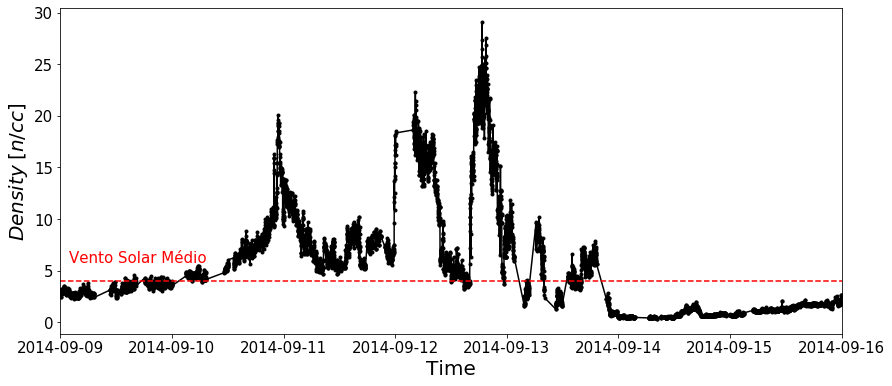

In [9]:
fig = plt.figure(figsize=(14,6))
mask = density < 999
ticks = time[mask].astype('datetime64[s]').tolist()
plt.plot(ticks, density[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.ylabel(r'$Density \;[n/cc]$',fontsize=20)
plt.axhline(4,c='r',ls='--')
plt.annotate('Vento Solar Médio',xy=[ticks[100],5.8],c='r',fontsize=15)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Veja que que da observação dos outro
s parâmetros vemos que a CME chegou nos detectores do satélite no final do dia 12/09, porém ao analisar a densidade de partículas, vemos mais dois picos antes do pico esperado em 12/09. Isso é um reflexo da altíssima atividade solar nessa época como já mencinado no [Ciclo Magnético Solar](https://github.com/GabrielZuza/PET/blob/master/Sunspots.ipynb) em 2012 o Sol estava no pico de atividade solar.

### Temperatura

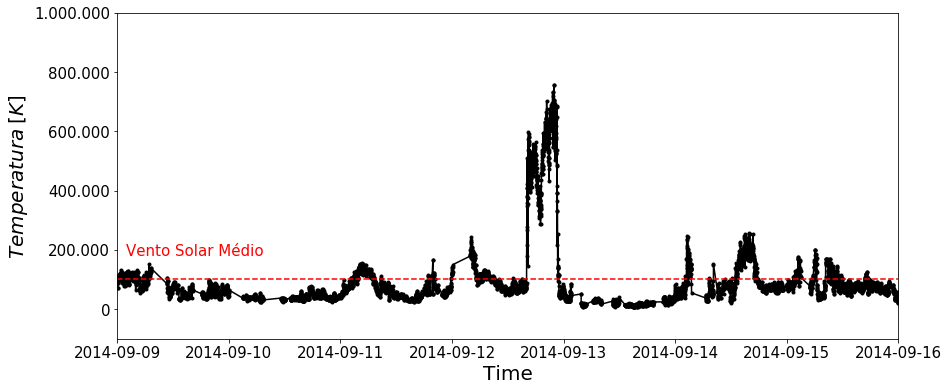

In [10]:
#fig = plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
mask = temp < 1e7
ticks = time[mask].astype('datetime64[s]').tolist()
plt.plot(ticks, temp[mask],'k.-')
plt.plot(time,temp)
plt.xlim(ticks[0],ticks[-1])
plt.ylim(-0.01e7,0.1e7)
plt.ylabel(r'$Temperatura \;[K]$',fontsize=20)
plt.axhline(100000,c='r',ls='--')
plt.annotate('Vento Solar Médio',xy=[ticks[100],180000],c='r',fontsize=15)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.linspace(0,1e6,6),[  '0',  '200.000',  '400.000',  '600.000',  '800.000', '1.000.000'],fontsize=15)
plt.show()

É válido lembrar que a temperatura na superfície do Sol (na fotosfera - o mínimo da temperatura) é na casa de $5500 \;K$, as temperaturas que são detectadas são bem maiores que as detectadas na fotosfera pois essa ejeção de massa é proveniente da coroa (como o próprio nome diz) e caimos de novo no [Problema de aquecimento da Coroa](https://en.wikipedia.org/wiki/Stellar_corona#:~:text=The%20coronal%20heating%20problem%20in,than%20that%20of%20the%20surface.&text=Between%20the%20photosphere%20and%20the,known%20as%20the%20transition%20region.).

### Campo Elétrico

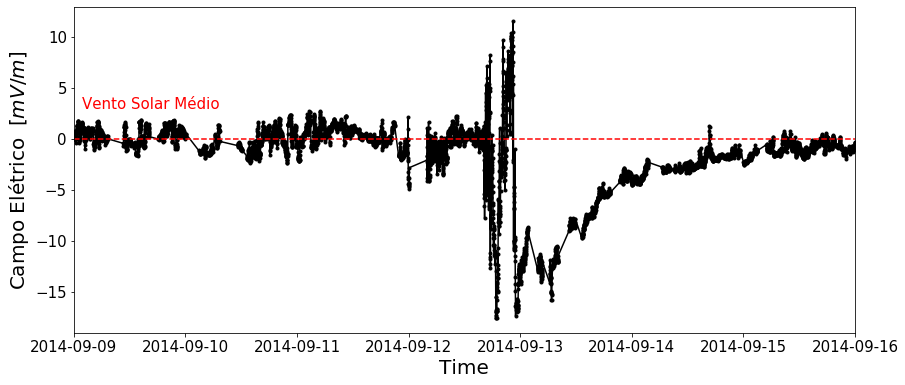

In [11]:
fig = plt.figure(figsize=(14,6))
mask = E < 999
ticks = time[mask].astype('datetime64[s]').tolist()
plt.plot(ticks, E[mask],'k.-')
plt.xlim(ticks[0],ticks[-1])
plt.ylabel(r'Campo Elétrico $\;[mV/m]$',fontsize=20)
plt.axhline(0,c='r',ls='--')
plt.annotate('Vento Solar Médio',xy=[ticks[100],3],c='r',fontsize=15)
plt.xlabel('Time',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Referências

[1] - Kelvinsong/Wikimedia Commons

[2] - NASA - Solar Dynamic Observatory - [SDO](https://sdo.gsfc.nasa.gov/)

[3] - Introduction to Plasma Physics I: Magnetohydrodynamics - Matthew Kunz [YouTube](https://www.youtube.com/watch?v=A9pUXEI128U&ab_channel=InstituteforAdvancedStudy) 

[4] - Github: kutaibaa-akraa

[5] - NASA - Space Physics Data Facility - [SPDF](https://spdf.gsfc.nasa.gov/)